# Proyecto de Mineria de Datos #
## CodelCOVID-19##
### Analisis exploratorio de datos###

En este documento se realizara el analisis exploratorio de datos de dos tipos de dataset:
* Dataset de el valor de criptomoneda por fecha
* Dataset de cantidad de contagiados por dia de diferentes paises del mundo ordenados alfabeticamente

# Proyecto_criptomonedas_covid19

  Este repositorio está enfocado a contener el trabajo realizado como proyecto para la asignatura TEL - 354, Minería de Datos.
El objetivo de este proyecto es realizar un análisis que permita concluir la incidencia de la pandemia producida por COVID-19
en los valores de las criptomonedas más relevantes del mercado mundial, específicamente BitCoin y Ethereum.
  
  Se tienen 3 datasets, dos referentes a las criptomonedas que tienen por nombre BTC.xlsx y ETH.xlsx, y el dataset referente a
la información del COVID-19 que tiene por nombre dataset_covid.

Las columnas de dataset_covid son:

* dateRep : Conjunción de la fecha completa. (date)
* day : Dia. (int)
* month : Mes. (int)
* year  : Año. (int)
* cases : Cantidad de casos.  (int)
* deaths : Cantidad de muertes. (int)
* countriesAndTerritories: Nombre del país en cuestión. (string)
* geoId :  Código que representa a una entidad geográfica. (string)
* countryterritoryCode: Código correspondiente al país. (string)
* opData2019
* continentExp
* Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
   
Las columnas de los datasets de criptomonedas son:

* Date : Fecha de la jornada. (date)
* Open : Valor que obtuvo la criptomoneda al abrir la jornada. (float)
* High : Valor máximo que obtuvo la criptomoneda al finalizar la jornada. (float)
* Low  : Valor mínimo que obtuvo la criptomoneda al finalizar la jornada. (float)
* Close : Valor con el que la moneda cerró la jornada.  (float)
* Volume : Número total de monedas negociadas en un valor durante la jornada. (int)
* Market Cap : Valor total en dolares de la totalidad de las criptomonedas. (int)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
df_eth=pd.read_csv("dataset_eth.csv")
df_btc= pd.read_csv("dataset_btc.csv")

df_eth = df_eth.drop(0).reset_index(drop=True)

In [3]:
fecha = pd.to_datetime(df_btc['Date'])
datetime_index = pd.DatetimeIndex(fecha.values) 
df_eth = df_eth.set_index(datetime_index).drop(['Date'],axis=1)
df_btc = df_btc.set_index(datetime_index).drop(['Date'],axis=1)


# Contagios por Pais

Lo primero que se realiza es un manejo del dataset para un mejor manejo de los datos

In [4]:
data_covid=pd.read_csv("dataset covid")

#Se genera la fecha en el formato de datetime
fecha=pd.to_datetime(data_covid["dateRep"],format="%d/%m/%Y")#"%d-%m-%Y")
#Se transforma a indice de tiempo los valores generados anteriormente
datetime_index = pd.DatetimeIndex(fecha.values) 
#Se setea como indice datetime_index
data_covid = data_covid.set_index(datetime_index)
#data_covid = data_covid.drop(columns=["dateRep"])
data_covid=data_covid.pivot(columns="countriesAndTerritories",values="cases").fillna(0)
#data_covid.iloc[0].max()
data_covid

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10,255.0,82.0,460.0,0.0,10.0,0.0,0.0,7267.0,526.0,0.0,...,9.0,63004.0,3.0,464.0,362.0,0.0,0.0,38.0,0.0,41.0
2020-07-11,458.0,90.0,0.0,0.0,62.0,0.0,1.0,3367.0,557.0,0.0,...,14.0,66625.0,8.0,483.0,431.0,1.0,0.0,24.0,0.0,16.0
2020-07-12,85.0,93.0,904.0,0.0,25.0,0.0,0.0,3462.0,489.0,0.0,...,14.0,63051.0,1.0,307.0,375.0,0.0,0.0,9.0,0.0,40.0
2020-07-13,0.0,83.0,483.0,0.0,23.0,0.0,0.0,2644.0,577.0,0.0,...,0.0,57258.0,1.0,680.0,287.0,2.0,0.0,76.0,0.0,3.0


Luego de tener la data estandarizada como las necesitamos se procede a graficar

## Grafico acumulativo

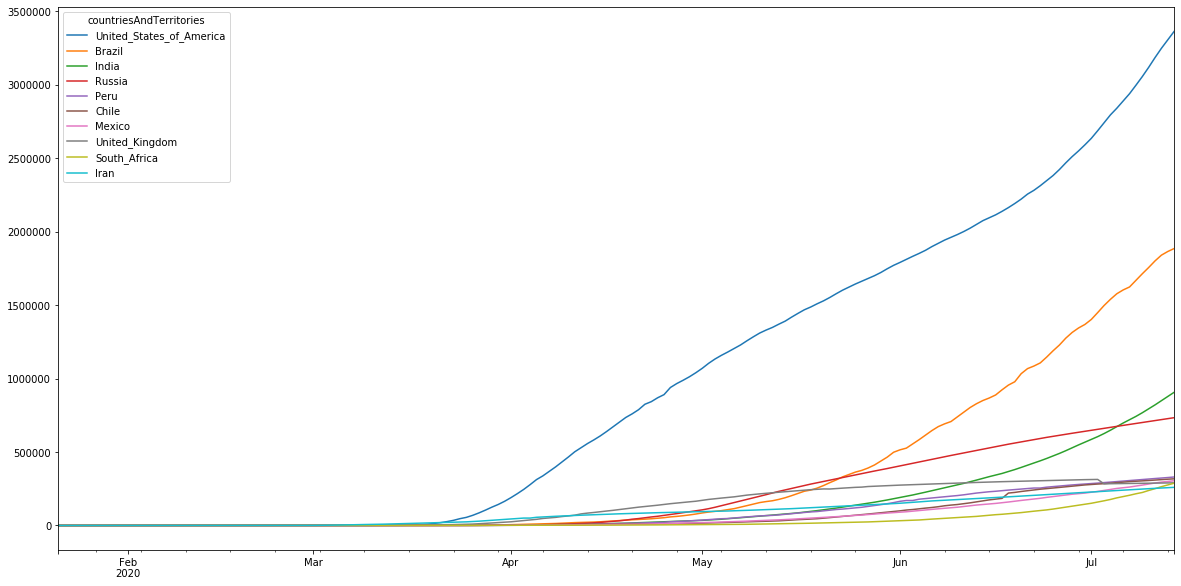

In [5]:

#Data de casos acumulativos
d=data_covid.cumsum()
#Ordenamiento de datos de mayor a menor, mediante el ultimo valor "index.values[-1]" 
max_val=d.sort_values(by=d.index.values[-1], axis=1,ascending=False)
#Extraccion de 10 paises con mayor cantidad de contagios acumulativos
paises_max=max_val.iloc[:,0:10]

#Extraccion de filas con 0
bool_df = (paises_max != 0).any(axis=1)
paises_max = paises_max.loc[bool_df]
paises_max.plot(figsize=(20,10))#grafico de contagios acumulativos por dia.

## Grafico de contagios por dia

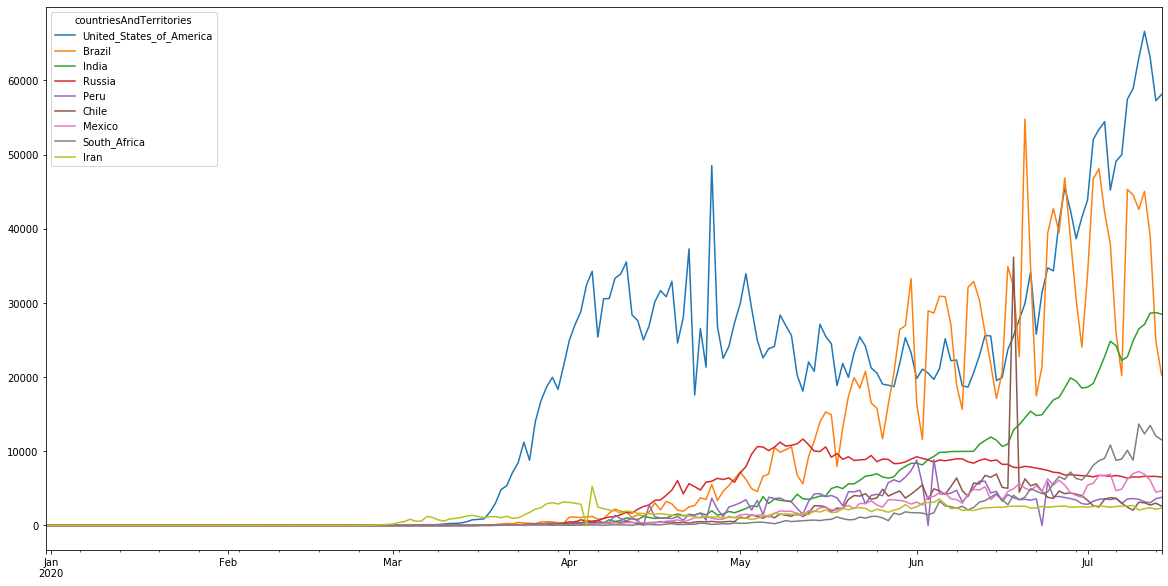

In [6]:
paises=list(paises_max.columns)
paises.pop(7)#Se saca United_Kingdom por error tipografico en la informacion
data_contagios_diarios= data_covid[paises]
data_contagios_diarios.plot(figsize=(20,10))#grafico de contagios por dia

### 3.2 - Por Continente ###

In [7]:
data_covid=pd.read_csv("dataset covid")

#Se genera la fecha en el formato de datetime
fecha=pd.to_datetime(data_covid["dateRep"],format="%d/%m/%Y")#"%d-%m-%Y")
#Se transforma a indice de tiempo los valores generados anteriormente
datetime_index = pd.DatetimeIndex(fecha.values) 
#Se setea como indice datetime_index
data_covid = data_covid[["continentExp","cases"]]
data_covid["date"]=fecha

data_continent=data_covid.groupby(["date","continentExp"]).sum()["cases"].unstack().fillna(0)
data_continent

continentExp,Africa,America,Asia,Europe,Oceania,Other
date,,,,,,
2019-12-31,0.0,0.0,27.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,17.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-07-10,18766.0,139717.0,54620.0,15329.0,176.0,0.0
2020-07-11,17120.0,143140.0,55132.0,14356.0,303.0,0.0
2020-07-12,19128.0,130537.0,54446.0,13870.0,197.0,0.0


## Grafica acumulativa

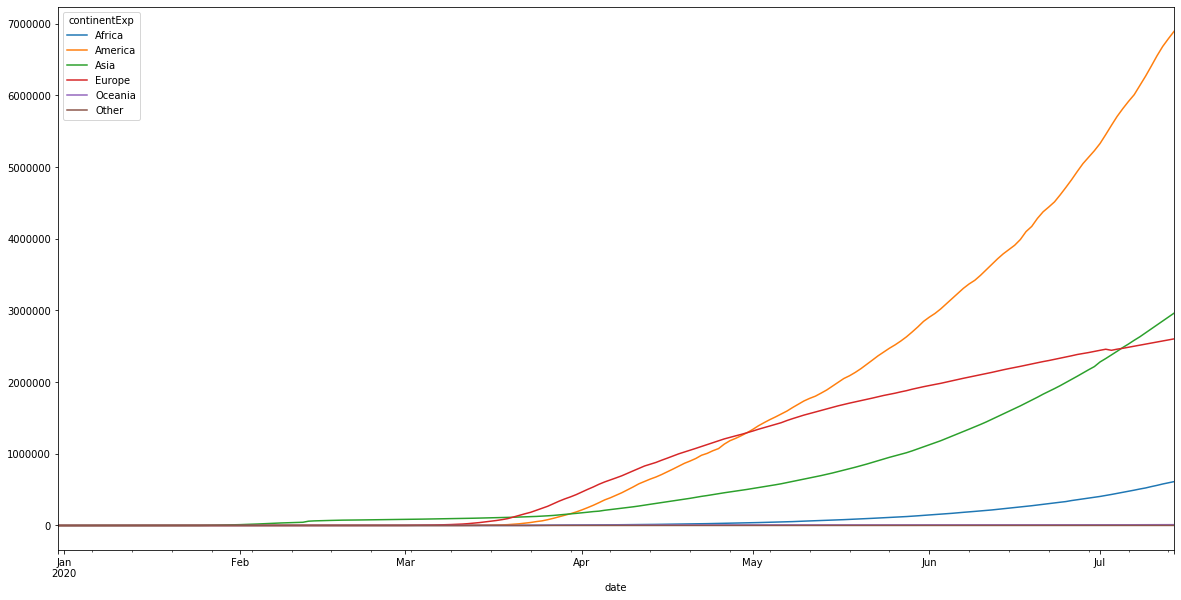

In [8]:
data_continent_sum=data_continent.cumsum()
data_continent_sum.plot(figsize=(20,10))

### 4. Graficos de criptomonedas

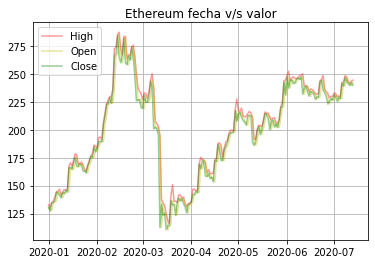

In [9]:
grafico_eth=plt.figure()
plt.grid(True)
plt.title('Ethereum fecha v/s valor')
plt.plot(df_eth.index,df_eth['High'],c='r',alpha=0.4,label='High')
#plt.plot(df_eth.index,df_eth['Low'],c='b',alpha=0.4,)
plt.plot(df_eth.index,df_eth['Open'],c='y',alpha=0.4,label='Open')
plt.plot(df_eth.index,df_eth['Close'],c='g',alpha=0.4,label='Close')
plt.legend()

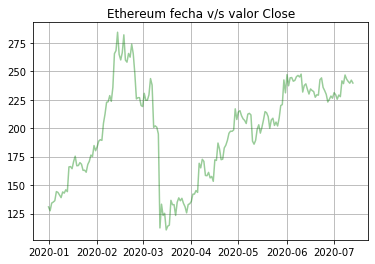

In [10]:
grafico_eth_close=plt.figure()
plt.grid(True)
plt.title('Ethereum fecha v/s valor Close')
plt.plot(df_eth.index,df_eth['Close'],c='g',alpha=0.4)

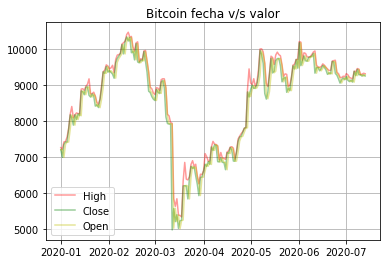

In [11]:
grafico_btc = plt.figure()
plt.grid(True)
plt.title('Bitcoin fecha v/s valor')
plt.plot(df_btc.index,df_btc['High'],c='r',alpha=0.4,label='High')
#plt.plot(df_btc.index,df_btc['Low'],c='b',alpha=0.4,)
plt.plot(df_btc.index,df_btc['Close'],c='g',alpha=0.4,label='Close')
plt.plot(df_btc.index,df_btc['Open'],c='y',alpha=0.4,label='Open')
plt.legend()

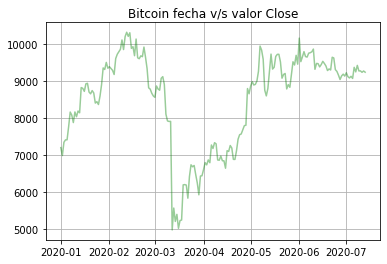

In [12]:
grafico_eth_close=plt.figure()
plt.grid(True)
plt.title('Bitcoin fecha v/s valor Close')
plt.plot(df_btc.index,df_btc['Close'],c='g',alpha=0.4)

### 5. Comparacion de Criptomonedas con Covid19

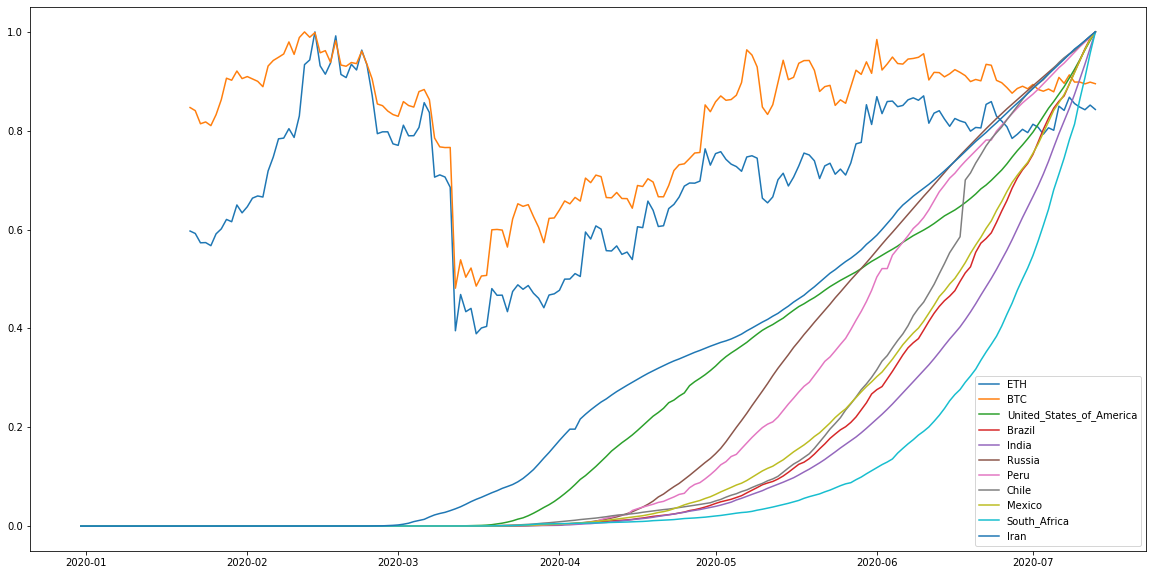

In [13]:
# Se estandarizan los dias para los dataframes
df_btc_eq = df_btc[:len(df_btc)-20]
df_eth_eq = df_eth[:len(df_eth)-20]
df_covid_eq = data_contagios_diarios[:-1].cumsum()

plt.figure(figsize=(20,10))

x_scaled_eth = df_eth_eq['Close'] / df_eth_eq['Close'].max() #Se normaliza la data
plt.plot(df_eth_eq.index,x_scaled_eth,label='ETH')

x_scaled_btc = df_btc_eq['Close'] / df_btc_eq['Close'].max() #Se normaliza la data
plt.plot(df_btc_eq.index,x_scaled_btc,label='BTC')

x_scaled_covid = df_covid_eq / df_covid_eq.max() #Se normaliza la data
for i in x_scaled_covid:
    plt.plot(df_covid_eq.index,x_scaled_covid[i],label=i)

plt.legend()

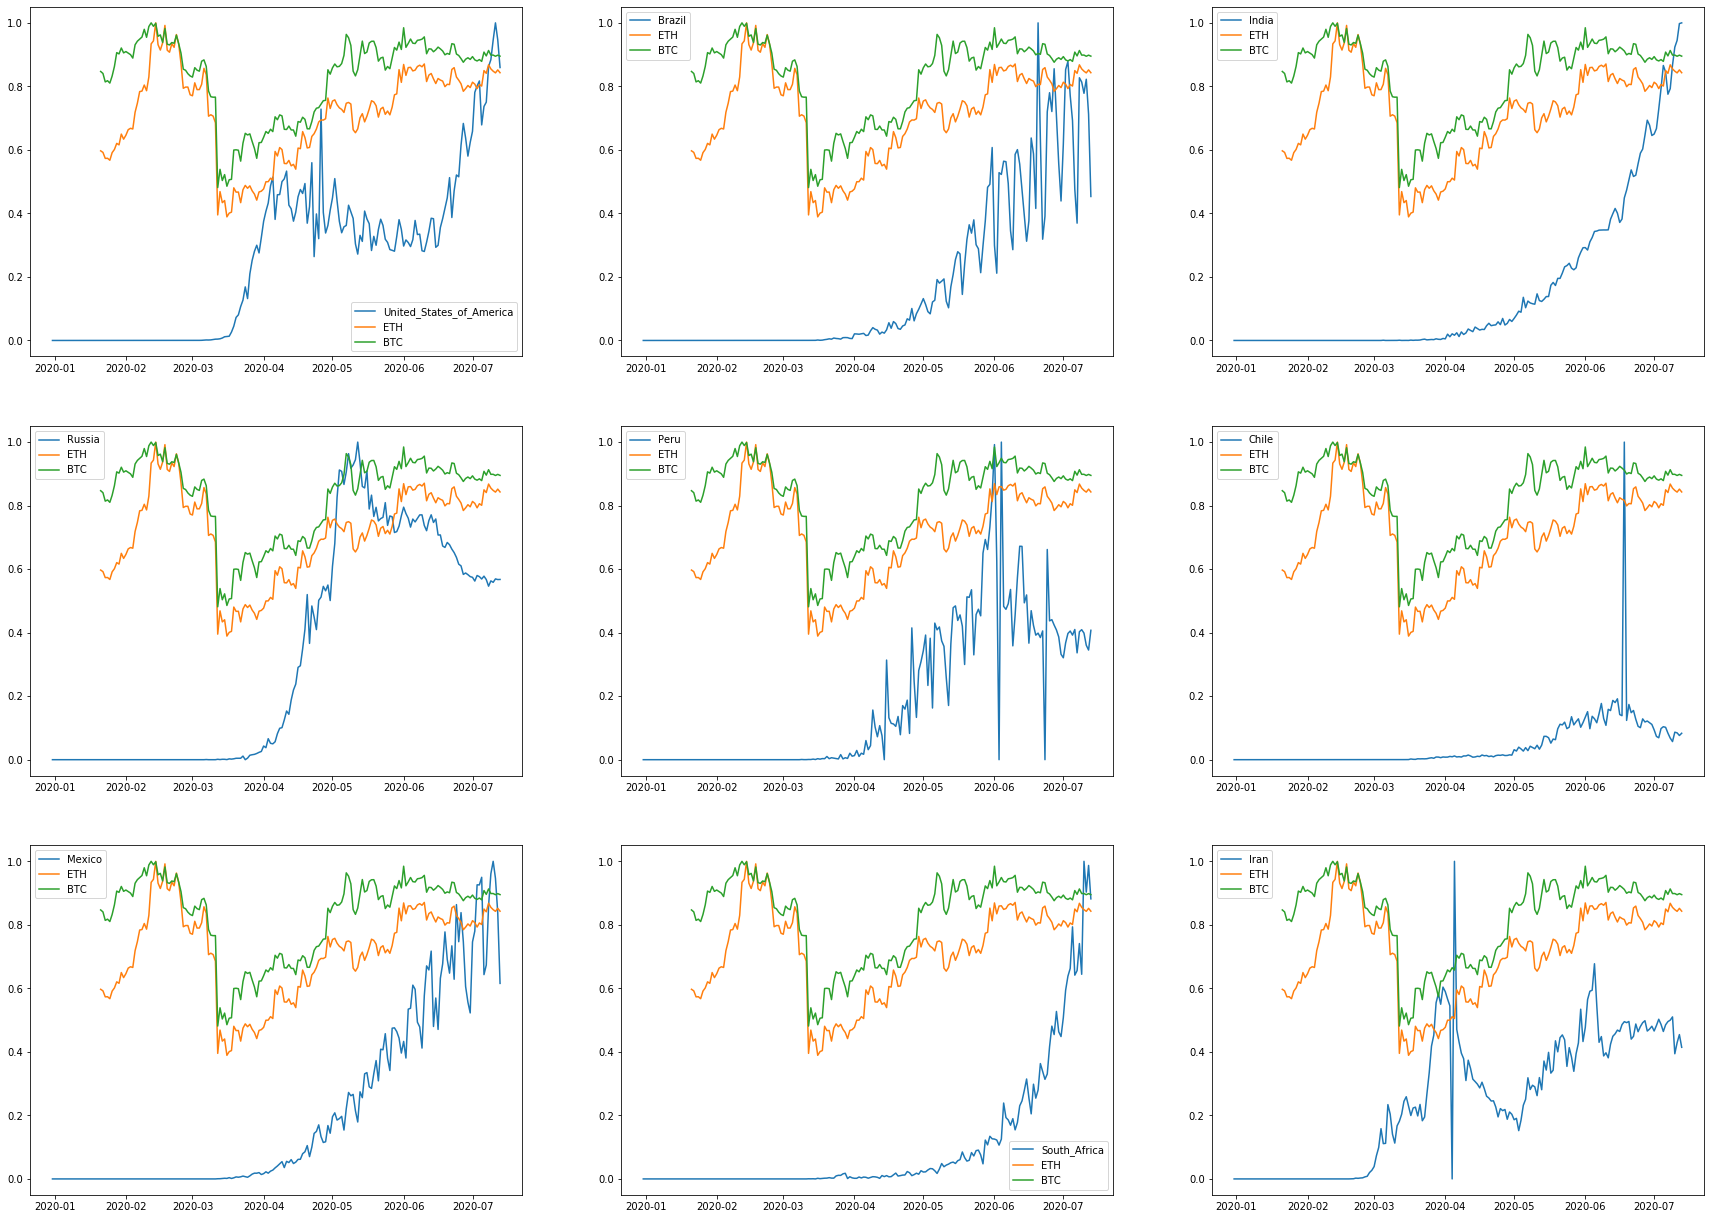

In [18]:
# Se estandarizan los dias para los dataframes
df_btc_eq = df_btc[:len(df_btc)-20]
df_eth_eq = df_eth[:len(df_eth)-20]
df_covid_eq = data_contagios_diarios[:-1]

plt.figure(figsize=(30,500))

x_scaled_eth = df_eth_eq['Close'] / df_eth_eq['Close'].max() #Se normaliza la data


x_scaled_btc = df_btc_eq['Close'] / df_btc_eq['Close'].max() #Se normaliza la data


x_scaled_covid = df_covid_eq / df_covid_eq.max() #Se normaliza la data
j=1
for i in x_scaled_covid:
    ax=plt.subplot(len(df_covid_eq)/3,3,j)
    ax.plot(df_covid_eq.index,x_scaled_covid[i],label=i)
    ax.plot(df_eth_eq.index,x_scaled_eth,label='ETH')
    ax.plot(df_btc_eq.index,x_scaled_btc,label='BTC')
    ax.legend()
    j+=1
